### Jupyter notebook for practice quiz for lesson 2.4.2
This Jupyter notebook implements a constant-power/constant-voltage charging scenario, as taught in this lesson

In [1]:
% add the toolbox code to Octave's path
addpath readonly
load readonly/E1model.mat; 

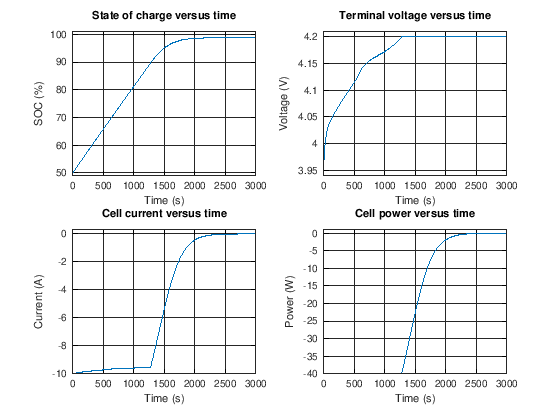

In [2]:
% Get ESC model parameters
maxtime = 3001; T = 25; % Simulation run time, temperature
q  = getParamESC('QParam',T,model); 
rc = exp(-1./abs(getParamESC('RCParam',T,model)));
r  = (getParamESC('RParam',T,model));
m  = getParamESC('MParam',T,model);
g  = getParamESC('GParam',T,model);
r0 = getParamESC('R0Param',T,model);

maxV = 4.2; % maximum cell voltage of 4.15 V

storez = zeros([maxtime 1]);  % create storage for SOC
storev = zeros([maxtime 1]);  % create storage for voltage
storei = zeros([maxtime 1]);  % create storage for current
storep = zeros([maxtime 1]);  % create storage for power
z  = 0.5; irc = 0; h  = -1; % initialize to 50% SOC, resting

% Simulate CP/CV
z  = 0.5; irc = 0; h  = -1; % initialize to 50% SOC, resting
CP = 40; % constant power limit of 35 W in CP/CV charge

for k = 1:maxtime,
  v = OCVfromSOCtemp(z,T,model) + m*h - r*irc; % fixed voltage

  % try CP first
  ik = (v - sqrt(v^2 - 4*r0*(-CP)))/(2*r0);
  if v - ik*r0 > maxV, % too much!
    ik = (v - maxV)/r0; % do CV instead
  end

  z = z - (1/3600)*ik/q;  % Update cell SOC
  irc = rc*irc + (1-rc)*ik; % Update resistor currents
  fac = exp(-abs(g.*ik)./(3600*q));
  h = fac.*h + (fac-1).*sign(ik); % Update hysteresis voltages
  storez(k) = z; % Store SOC for later plotting
  storev(k) = v - ik*r0;
  storei(k) = ik; % store current for later plotting
  storep(k) = ik*storev(k);
end % for k

time = 0:maxtime -1;
subplot(2,2,1); plot(time,100*storez); 
title('State of charge versus time');
xlabel('Time (s)'); ylabel('SOC (%)'); ylim([49 101]); grid on

subplot(2,2,2); plot(time,storev); 
title('Terminal voltage versus time');
xlabel('Time (s)'); ylabel('Voltage (V)');
ylim([3.94 4.21]); grid on

subplot(2,2,3); plot(time,storei); 
title('Cell current versus time');
xlabel('Time (s)'); ylabel('Current (A)');
ylim([-10 0.3]); grid on

subplot(2,2,4); plot(time,storep);
title('Cell power versus time');
xlabel('Time (s)'); ylabel('Power (W)');
ylim([-40 1]); grid on

In [14]:
storei(1269)

ans = -9.5264


In [15]:
find(storep == -40.000)

ans =

     14
     45
     69
     90
     95
    108
    125
    140
    200
    330
    341
    357
    416
    435
    454
    553
    604
    680
    716
    726
    735
    743
    855
    868
    879
    928
   1046
   1053
   1056
   1090
   1103
   1109
   1122
   1129
   1134
   1143
   1168
   1251
   1269



In [6]:
storep

storep =

  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e

  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0

  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0000e+01
  -4.0

  -7.3786e+00
  -7.3405e+00
  -7.3026e+00
  -7.2649e+00
  -7.2274e+00
  -7.1901e+00
  -7.1529e+00
  -7.1160e+00
  -7.0793e+00
  -7.0427e+00
  -7.0063e+00
  -6.9702e+00
  -6.9342e+00
  -6.8984e+00
  -6.8628e+00
  -6.8273e+00
  -6.7921e+00
  -6.7570e+00
  -6.7221e+00
  -6.6874e+00
  -6.6529e+00
  -6.6185e+00
  -6.5844e+00
  -6.5504e+00
  -6.5165e+00
  -6.4829e+00
  -6.4494e+00
  -6.4161e+00
  -6.3830e+00
  -6.3500e+00
  -6.3172e+00
  -6.2846e+00
  -6.2522e+00
  -6.2199e+00
  -6.1878e+00
  -6.1558e+00
  -6.1240e+00
  -6.0924e+00
  -6.0610e+00
  -6.0297e+00
  -5.9985e+00
  -5.9676e+00
  -5.9366e+00
  -5.9025e+00
  -5.8690e+00
  -5.8359e+00
  -5.8030e+00
  -5.7703e+00
  -5.7379e+00
  -5.7056e+00
  -5.6735e+00
  -5.6416e+00
  -5.6099e+00
  -5.5783e+00
  -5.5469e+00
  -5.5157e+00
  -5.4847e+00
  -5.4539e+00
  -5.4232e+00
  -5.3927e+00
  -5.3624e+00
  -5.3322e+00
  -5.3022e+00
  -5.2724e+00
  -5.2427e+00
  -5.2132e+00
  -5.1839e+00
  -5.1548e+00
  -5.1258e+00
  -5.0969e+00
  -5.0683e+00
  -5.0

  -2.2115e-01
  -2.1977e-01
  -2.1841e-01
  -2.1705e-01
  -2.1570e-01
  -2.1436e-01
  -2.1303e-01
  -2.1170e-01
  -2.1039e-01
  -2.0908e-01
  -2.0778e-01
  -2.0649e-01
  -2.0521e-01
  -2.0393e-01
  -2.0266e-01
  -2.0140e-01
  -2.0015e-01
  -1.9891e-01
  -1.9767e-01
  -1.9644e-01
  -1.9522e-01
  -1.9401e-01
  -1.9280e-01
  -1.9160e-01
  -1.9041e-01
  -1.8923e-01
  -1.8805e-01
  -1.8688e-01
  -1.8572e-01
  -1.8457e-01
  -1.8342e-01
  -1.8228e-01
  -1.8115e-01
  -1.8002e-01
  -1.7890e-01
  -1.7779e-01
  -1.7669e-01
  -1.7559e-01
  -1.7450e-01
  -1.7341e-01
  -1.7233e-01
  -1.7126e-01
  -1.7020e-01
  -1.6914e-01
  -1.6809e-01
  -1.6704e-01
  -1.6601e-01
  -1.6497e-01
  -1.6395e-01
  -1.6293e-01
  -1.6192e-01
  -1.6091e-01
  -1.5991e-01
  -1.5892e-01
  -1.5793e-01
  -1.5695e-01
  -1.5597e-01
  -1.5500e-01
  -1.5404e-01
  -1.5308e-01
  -1.5213e-01
  -1.5118e-01
  -1.5024e-01
  -1.4931e-01
  -1.4838e-01
  -1.4746e-01
  -1.4654e-01
  -1.4563e-01
  -1.4473e-01
  -1.4383e-01
  -1.4293e-01
  -1.4

  -5.7264e-03
  -5.6909e-03
  -5.6555e-03
  -5.6203e-03
  -5.5854e-03
  -5.5507e-03
  -5.5162e-03
  -5.4819e-03
  -5.4478e-03
  -5.4140e-03
  -5.3803e-03
  -5.3469e-03
  -5.3136e-03
  -5.2806e-03
  -5.2478e-03
  -5.2152e-03
  -5.1827e-03
  -5.1505e-03
  -5.1185e-03
  -5.0867e-03
  -5.0551e-03
  -5.0237e-03
  -4.9924e-03
  -4.9614e-03
  -4.9306e-03
  -4.8999e-03
  -4.8695e-03
  -4.8392e-03
  -4.8091e-03
  -4.7792e-03
  -4.7495e-03
  -4.7200e-03
  -4.6907e-03
  -4.6615e-03
  -4.6325e-03
  -4.6037e-03
  -4.5751e-03
  -4.5467e-03
  -4.5184e-03
  -4.4903e-03
  -4.4624e-03
  -4.4347e-03
  -4.4071e-03
  -4.3797e-03
  -4.3525e-03
  -4.3255e-03
  -4.2986e-03
  -4.2719e-03
  -4.2453e-03
  -4.2189e-03
  -4.1927e-03
  -4.1666e-03
  -4.1407e-03
  -4.1150e-03
  -4.0894e-03
  -4.0640e-03
  -4.0387e-03
  -4.0136e-03
  -3.9887e-03
  -3.9639e-03
  -3.9393e-03
  -3.9148e-03
  -3.8904e-03
  -3.8663e-03
  -3.8422e-03
  -3.8183e-03
  -3.7946e-03
  -3.7710e-03
  -3.7476e-03
  -3.7243e-03
  -3.7011e-03
  -3.6

In [8]:
find(storev == 4.20)

ans =

   1278
   1279
   1280
   1281
   1282
   1283
   1284
   1285
   1286
   1287
   1288
   1289
   1290
   1291
   1292
   1293
   1294
   1295
   1296
   1297
   1298
   1299
   1300
   1301
   1302
   1303
   1304
   1305
   1306
   1307
   1308
   1309
   1310
   1311
   1312
   1313
   1314
   1315
   1316
   1317
   1318
   1319
   1320
   1321
   1322
   1323
   1324
   1325
   1326
   1327
   1328
   1329
   1330
   1331
   1332
   1333
   1334
   1335
   1336
   1337
   1338
   1339
   1340
   1341
   1342
   1343
   1344
   1345
   1346
   1347
   1348
   1349
   1350
   1351
   1352
   1353
   1354
   1355
   1356
   1357
   1358
   1359
   1360
   1361
   1362
   1363
   1364
   1365
   1366
   1367
   1368
   1369
   1370
   1371
   1372
   1373
   1374
   1375
   1376
   1377
   1378
   1379
   1380
   1381
   1382
   1383
   1384
   1385
   1386
   1387
   1388
   1389
   1390
   1391
   1392
   1393
   1394
   1395
   1396
   1397
   1398
   1399
   1400
   1401
 

   2302
   2303
   2304
   2305
   2306
   2307
   2308
   2309
   2310
   2311
   2312
   2313
   2314
   2315
   2316
   2317
   2318
   2319
   2320
   2321
   2322
   2323
   2324
   2325
   2326
   2327
   2328
   2329
   2330
   2331
   2332
   2333
   2334
   2335
   2336
   2337
   2338
   2339
   2340
   2341
   2342
   2343
   2344
   2345
   2346
   2347
   2348
   2349
   2350
   2351
   2352
   2353
   2354
   2355
   2356
   2357
   2358
   2359
   2360
   2361
   2362
   2363
   2364
   2365
   2366
   2367
   2368
   2369
   2370
   2371
   2372
   2373
   2374
   2375
   2376
   2377
   2378
   2379
   2380
   2381
   2382
   2383
   2384
   2385
   2386
   2387
   2388
   2389
   2390
   2391
   2392
   2393
   2394
   2395
   2396
   2397
   2398
   2399
   2400
   2401
   2402
   2403
   2404
   2405
   2406
   2407
   2408
   2409
   2410
   2411
   2412
   2413
   2414
   2415
   2416
   2417
   2418
   2419
   2420
   2421
   2422
   2423
   2424
   2425
   2426
